In [44]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_auc_score,roc_curve,plot_roc_curve

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import make_column_transformer

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('D:\\fliprobo\\project\\P6\\Malignant-Comments-Classifier-Project--1---1-\\Malignant Comments Classifier Project\\train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
test=pd.read_csv('D:\\fliprobo\\project\\P6\\Malignant-Comments-Classifier-Project--1---1-\\Malignant Comments Classifier Project\\test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
print('train shape is ',train.shape)
print('test shape is ',test.shape)
print('test info',test.info())


print('train info',train.info())

train shape is  (159571, 8)
test shape is  (153164, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
test info None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)


In [5]:
print('train data Set descriptin',train.describe())
print('test data Set descriptin',test.describe())

train data Set descriptin            malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000 

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


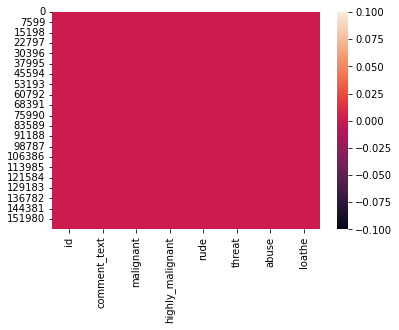

In [6]:
# checking null values
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

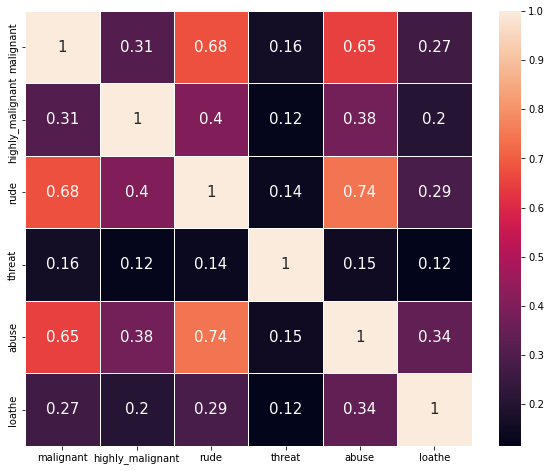

In [7]:
## checking correlation in dataset
plt.figure(figsize=(10,8))
sns.heatmap(train.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.show()

In [8]:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

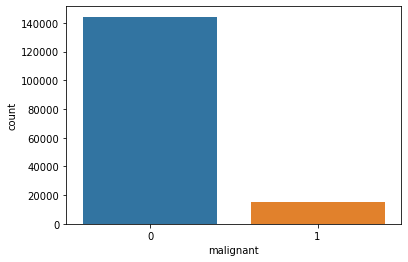

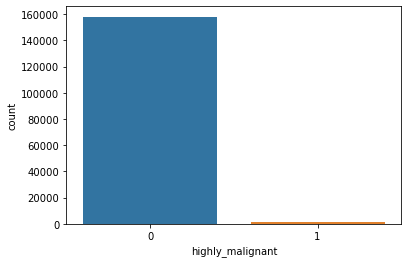

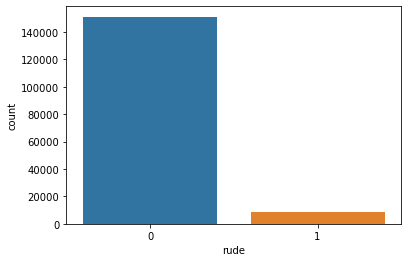

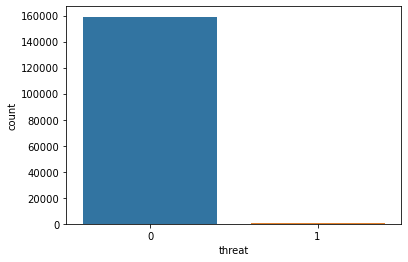

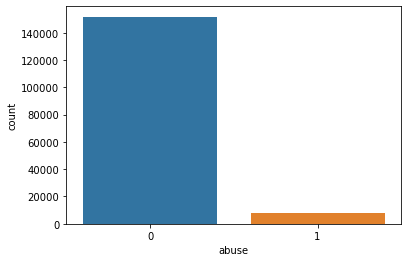

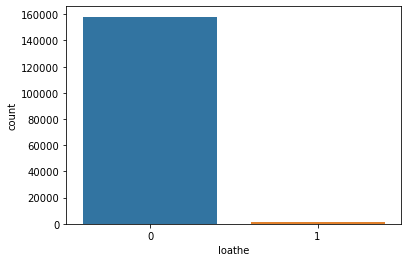

In [9]:
for col in train.drop(["id","comment_text"],axis=1):
    sns.countplot(train[col])
    plt.show()

In [10]:
train['length'] = train['comment_text'].str.len()
train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [11]:
train['comment_text'] = train['comment_text'].str.lower()

train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english'))
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [12]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,181
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,101
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [13]:
print ('Original Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Original Length 62893130
Clean Length 43191165


In [14]:
!pip3 install wordcloud

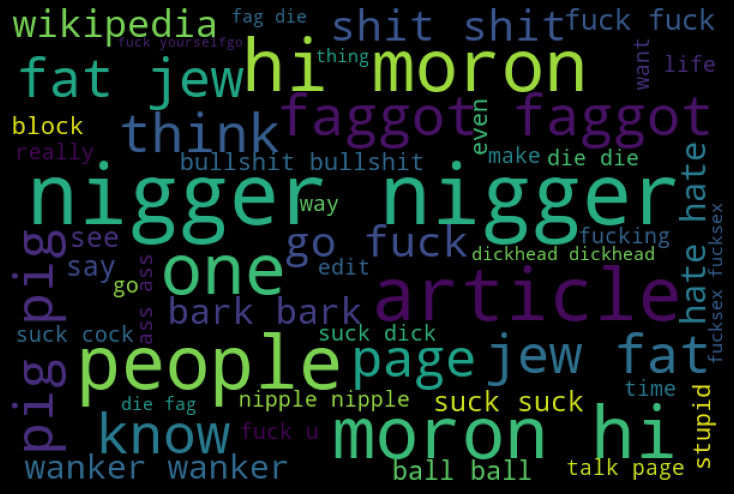

In [15]:
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,181
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,101
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


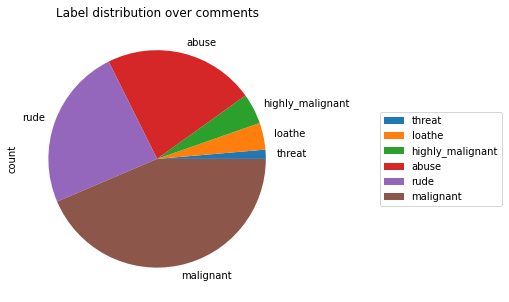

In [17]:
target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
pie_distribution = train[target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

pie_distribution.plot.pie(y='count',title='Label distribution over comments',
                          figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

plt.show()

In [21]:
target_data = train[target]

train['bad'] =train[target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


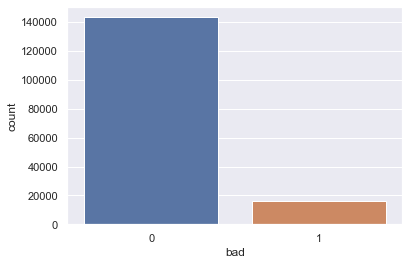

In [22]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

In [23]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])

In [24]:
label=train['bad']

<AxesSubplot:xlabel='bad', ylabel='count'>

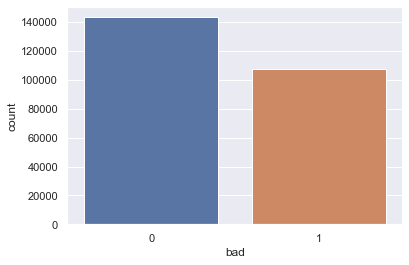

In [26]:
over_sampling=SMOTE(0.75)
X,Y=over_sampling.fit_resample(features,label)

sns.countplot(Y)

In [39]:
Linear=LogisticRegression()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()
DT=DecisionTreeClassifier()

algo=[Linear,RandomForest,DT,knn]
maximum_acc=[]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=107)

for model in algo:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    accuracy=round(accuracy_score(Y_test,Y_pred),4)*100
    confusionMatrix=confusion_matrix(Y_test,Y_pred)
    classificationReport=classification_report(Y_test,Y_pred)
    maximum_acc.append(accuracy)
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The accuracy is {accuracy} of model {model} at random state {rs}")
    print("\n\nConfusion Matrix:\n\n",confusionMatrix)
    print(f"\n\n\n Classification report for the model:\n",classificationReport)
    

LogisticRegression():
---------------------------
---------------------------

The accuracy is 92.84 of model LogisticRegression() at random state 107


Confusion Matrix:

 [[44009  3160]
 [ 2770 32844]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     47169
           1       0.91      0.92      0.92     35614

    accuracy                           0.93     82783
   macro avg       0.93      0.93      0.93     82783
weighted avg       0.93      0.93      0.93     82783

RandomForestClassifier():
---------------------------
---------------------------

The accuracy is 97.09 of model RandomForestClassifier() at random state 107


Confusion Matrix:

 [[45663  1506]
 [  906 34708]]



 Classification report for the model:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     47169
           1       0.96      0.97      0.97     35614

    accur

#### Plotting ROC Curve

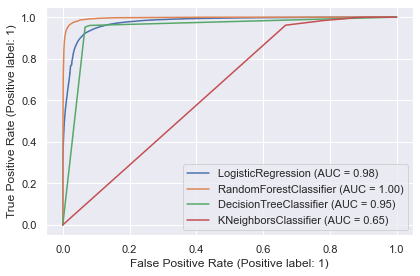

In [45]:
dis=plot_roc_curve(Linear,X_test,Y_test)
plot_roc_curve(RandomForest,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(DT,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(knn,X_test,Y_test,ax=dis.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.tight_layout()

here for model Random Forest we get the highest AUC score. So, we finalized RandomForest model.

#### Hyper parameter Tuning

In [51]:
reg=RandomForestClassifier()
param={
    "n_estimators":[550,250],
    "min_samples_split":[4],
    "min_samples_leaf":[2],
    "max_depth":[27]
    
}
grd=GridSearchCV(reg,param_grid=param,cv=5)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

reg=grd.best_estimator_   #reinstantiating the best parameter to algo

reg.fit(X_train,Y_train)
ypred=reg.predict(X_test)

print(f"The accuracy is {round(accuracy_score(ypred,Y_test)*100,2)}% of model Random Forest.")


print("\nClassification Report:",classification_report(ypred,Y_test))

print(f"\n Confusion Matrix for the model:",confusion_matrix(ypred,Y_test))


Best Pramaeters: {'max_depth': 27, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 550}
The accuracy is 85.52% of model Random Forest.

Classification Report:               precision    recall  f1-score   support

           0       0.99      0.80      0.89     58189
           1       0.68      0.98      0.80     24594

    accuracy                           0.86     82783
   macro avg       0.83      0.89      0.84     82783
weighted avg       0.90      0.86      0.86     82783


 Confusion Matrix for the model: [[46684 11505]
 [  485 24109]]


As we have decrease in accuracy after hyper tuned. So, it's better to use Random Forest with default parameters.

In [54]:
value = tf_vec.fit_transform(test['comment_text'])

predicted_values_for_testDataset=RandomForest.predict(value)

In [55]:
predicted_values_for_testDataset

array([1, 0, 0, ..., 1, 1, 0])

In [56]:
pd.Series(predicted_values_for_testDataset).to_csv("predicted_values_for_testDataset.csv")

In [58]:
# Saving model

import pickle
pickle.dump(RandomForest,open("Comment_Classifier.pickle","wb"))